In [ ]:
Librerias

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, golden

In [ ]:
Graficar Puntos

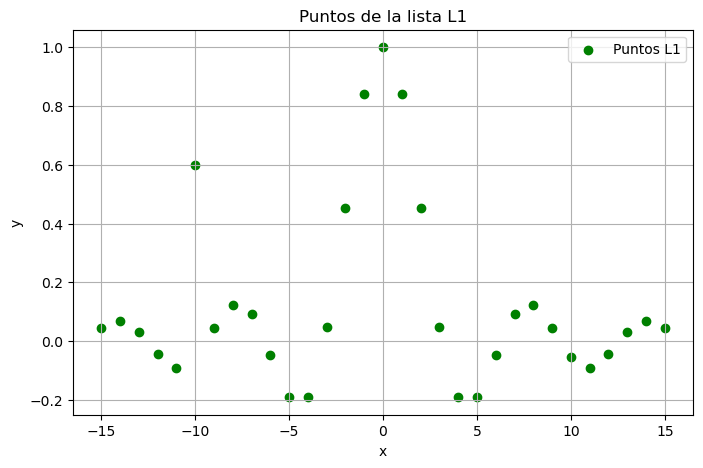

In [18]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os

# Definir la ruta completa al archivo en Windows
ruta_archivo = r"C:\Users\totoe\Desktop\5to semestre\Listas de puntos para el proyecto.txt"

if os.path.exists(ruta_archivo):
    with open(ruta_archivo, 'r', encoding='utf-8') as file:
        contenido = file.read()

    # Extraer puntos usando expresiones regulares (para L1)
    lista_puntos = re.findall(r'L1\s*=\s*\{(.*?)\};', contenido, re.DOTALL)[0]

    pares = re.findall(r'\{([^,]+),\s*([^\}]+)\}', lista_puntos)

    # Convertir a Float
    x_data = np.array([float(p[0]) for p in pares])
    y_data = np.array([float(p[1]) for p in pares])

    # Gráfica
    plt.figure(figsize=(8, 5))
    plt.scatter(x_data, y_data, color='green', label='Puntos L1')
    plt.title("Puntos de la lista L1")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print(f"El archivo no fue encontrado en la ruta: {ruta_archivo}")


In [ ]:
Ajuste de Curva

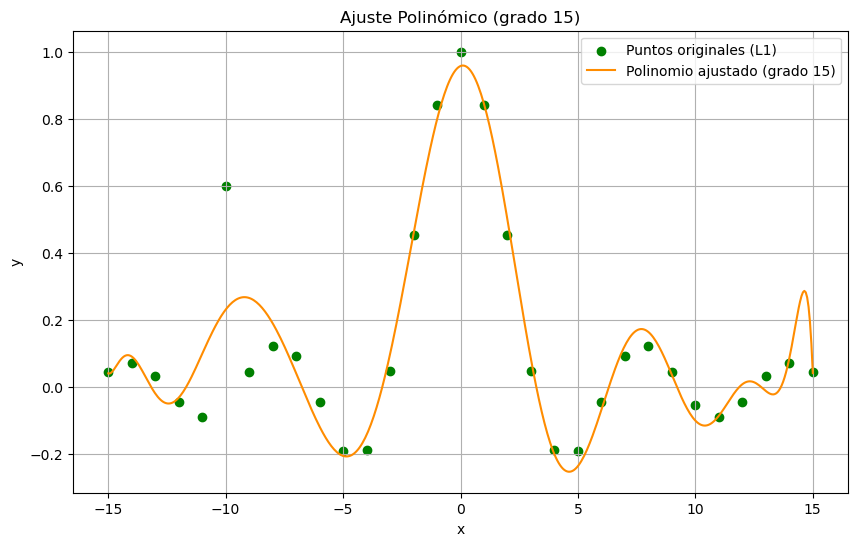

Coeficientes del polinomio (de mayor a menor grado):

[-2.02911170e-15 -2.03673823e-14  1.68072357e-12  1.75779511e-11
 -5.51965745e-10 -6.17872081e-09  9.09582850e-08  1.13170364e-06
 -7.82641231e-06 -1.13963302e-04  3.31590593e-04  6.03750372e-03
 -5.88697593e-03 -1.42285554e-01  2.86547264e-02  9.57357492e-01]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Datos originales
x_data = np.array([-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3,
                   -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

y_data = np.array([0.043, 0.070, 0.032, -0.0447, -0.090, 0.6, 0.045, 0.123,
                   0.093, -0.046, -0.191, -0.189, 0.047, 0.454, 0.841, 1, 0.841,
                   0.454, 0.047, -0.189, -0.191, -0.046, 0.093, 0.123, 0.045,
                   -0.054, -0.090, -0.044, 0.032, 0.070, 0.043])

# Ajuste de curva polinómico
grado = 15
coeficientes = np.polyfit(x_data, y_data, grado)
polinomio_ajustado = np.poly1d(coeficientes)

# Generar puntos suaves para la curva ajustada
x_curva = np.linspace(min(x_data), max(x_data), 500)
y_curva = polinomio_ajustado(x_curva)

# Gráfica
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='green', label='Puntos originales (L1)')
plt.plot(x_curva, y_curva, color='darkorange', label=f'Polinomio ajustado (grado {grado})')
plt.title("Ajuste Polinómico (grado 15)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# Mostrar coeficientes del polinomio
print("Coeficientes del polinomio (de mayor a menor grado):\n")
print(coeficientes)


In [ ]:
Que funcion nos da?

In [22]:
funcion_str = "f(x) = "
for i, coef in enumerate(polinomio_ajustado.coefficients):
    exp = len(polinomio_ajustado.coefficients) - i - 1
    signo = " + " if coef >= 0 else " - "
    coef_abs = abs(coef)
    if exp > 1:
        funcion_str += f"{signo}{coef_abs:.6e}·x^{exp}"
    elif exp == 1:
        funcion_str += f"{signo}{coef_abs:.6e}·x"
    else:
        funcion_str += f"{signo}{coef_abs:.6e}"

print(funcion_str.lstrip(" +"))

f(x) =  - 2.029112e-15·x^15 - 2.036738e-14·x^14 + 1.680724e-12·x^13 + 1.757795e-11·x^12 - 5.519657e-10·x^11 - 6.178721e-09·x^10 + 9.095829e-08·x^9 + 1.131704e-06·x^8 - 7.826412e-06·x^7 - 1.139633e-04·x^6 + 3.315906e-04·x^5 + 6.037504e-03·x^4 - 5.886976e-03·x^3 - 1.422856e-01·x^2 + 2.865473e-02·x + 9.573575e-01


In [ ]:
Maximo utilizando el Metodo de Newton-Raphson en el intervalo "[-4,2]"

Óptimo encontrado con método de Newton-Raphson:
Iteraciones: 2
x ≈ 0.100158
y ≈ 0.958795


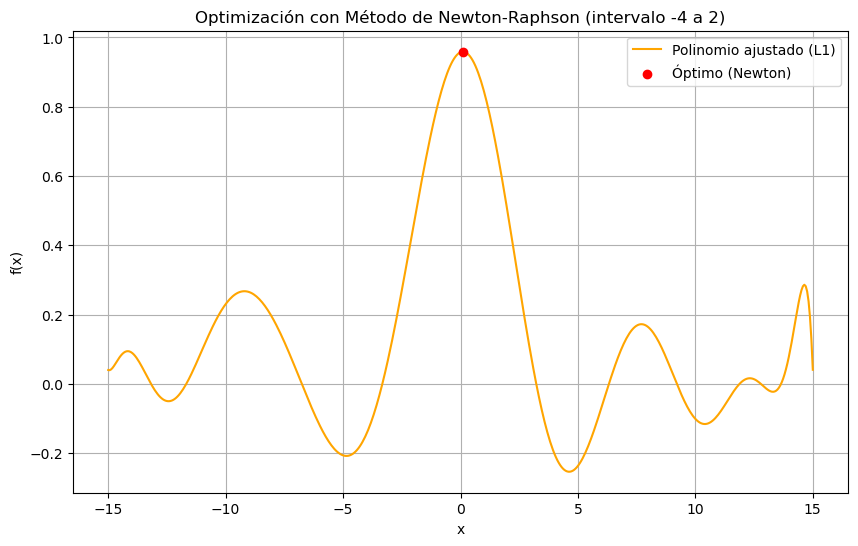

In [38]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Paso 1: Derivar el polinomio 
x = sp.symbols('x')
grado = 15
coeficientes = polinomio_ajustado.coefficients
f_sym = sum(sp.Float(c) * x**(grado - i) for i, c in enumerate(coeficientes))

# Derivadas
f_prime = sp.diff(f_sym, x)
f_double_prime = sp.diff(f_prime, x)

# Funciones evaluables numéricamente
f1 = sp.lambdify(x, f_prime, 'numpy')
f2 = sp.lambdify(x, f_double_prime, 'numpy')

# Paso 2: Método de Newton-Raphson con restricción al intervalo (-4, 2)
x0 = 0.0 
tolerancia = 1e-5
max_iter = 100
iteracion = 0
limite_inferior = -4
limite_superior = 2

while iteracion < max_iter:
    derivada_1 = f1(x0)
    derivada_2 = f2(x0)

    if derivada_2 == 0:
        print("Derivada segunda es cero. El método no puede continuar.")
        break

    x1 = x0 - derivada_1 / derivada_2
    x1 = np.clip(x1, limite_inferior, limite_superior)  # Restringir a [-4, 2]

    if abs(x1 - x0) < tolerancia:
        break

    x0 = x1
    iteracion += 1

# Resultado final
x_optimo = x1
y_optimo = polinomio_ajustado(x_optimo)

print("Óptimo encontrado con método de Newton-Raphson:")
print(f"Iteraciones: {iteracion}")
print(f"x ≈ {x_optimo:.6f}")
print(f"y ≈ {y_optimo:.6f}")

x_vals = np.linspace(min(x_data), max(x_data), 500)
y_vals = polinomio_ajustado(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Polinomio ajustado (L1)', color='orange')
plt.scatter(x_optimo, y_optimo, color='red', label='Óptimo (Newton)', zorder=5)
plt.title("Optimización con Método de Newton-Raphson (intervalo -4 a 2)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()
